***Task1***

---



I choose an image of cat from my files and the model detected it which was the goal of this task.

Loading image from: cat.png


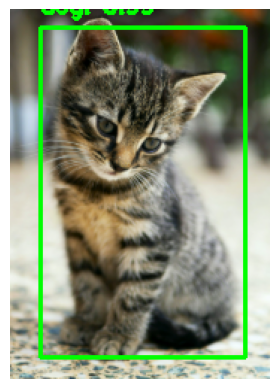

In [ ]:
# Step 1 —Import Libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Step 2 Load Pretrained Faster R-CNN model
MODEL_URL = "https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1"
model = hub.load(MODEL_URL)

COCO_CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Step 3: Function for performing object detection
def perform_object_detection(image_path, threshold=0.5):
    # Load image from file path
    print("Loading image from:", image_path)
    image = Image.open(image_path)
    # If image is not loaded
    if image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}. Please check the file path.")
    image_rgb = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    # Resize image to the model's expected input size
    input_tensor = tf.convert_to_tensor(image_rgb)
    input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension
    detections = model(input_tensor)
    # Extract results
    boxes = detections['detection_boxes'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(int)  # class indices, to adjust for zero-indexed
    scores = detections['detection_scores'][0].numpy()
    # Filter out detections below the confidence threshold
    valid_detections = scores > threshold
    boxes = boxes[valid_detections]
    classes = classes[valid_detections]
    scores = scores[valid_detections]
    return image_rgb, boxes, classes, scores

# Step 4: Function for displaying image with bounding box
def display_image_with_detections(image, boxes, class_indices, scores, threshold=0.5):
    height, width, _ = image.shape
    for i in range(len(boxes)):
        if scores[i] > threshold:
            ymin, xmin, ymax, xmax = boxes[i]
            left, right, top, bottom = (int(xmin * width), int(xmax * width), int(ymin * height), int(ymax * height))
            # Draw bounding box
            cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
            # Draw label and confidence
            label = f"{COCO_CLASSES[class_indices[i] - 1]}: {scores[i]:.2f}"  # COCO classes are 1-indexed in model, list is 0-indexed
            cv2.putText(image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # Show the result with matplotlib
    plt.imshow(image[:, :, ::-1])  # BGR to RGB
    plt.axis('off')
    plt.show()

# Step 6: Evaluating the model with the given image
image_path = "cat.png"
try:
    image_rgb, detected_boxes, detected_classes, detected_scores = perform_object_detection(image_path, threshold=0.5)
    display_image_with_detections(image_rgb, detected_boxes, detected_classes, detected_scores, threshold=0.5)
except FileNotFoundError as e:
    print(e)

***TASK2***

---



Loading image from: cat.png


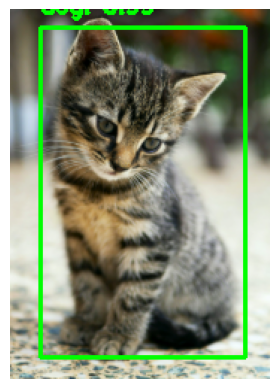

In [1]:
# Step 1 —Import Libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Step 2 Load Pretrained Faster R-CNN model

# Model 1 Resnet50
MODEL_URL = "https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1"
# Model 2 ResNet101
MODEL_URL_RESNET101 = "https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1"
# Model 3 Inception
MODEL_URL_INCEPTION_RESNET_V2 = "https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1"

model = hub.load(MODEL_URL)

COCO_CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Step 3: Function for performing object detection
def perform_object_detection(image_path, threshold=0.5):
    # Load image from file path
    print("Loading image from:", image_path)
    image = Image.open(image_path)
    # If image is not loaded
    if image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}. Please check the file path.")
    image_rgb = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    # Resize image to the model's expected input size
    input_tensor = tf.convert_to_tensor(image_rgb)
    input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension
    detections = model(input_tensor)
    # Extract results
    boxes = detections['detection_boxes'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(int)  # class indices, to adjust for zero-indexed
    scores = detections['detection_scores'][0].numpy()
    # Filter out detections below the confidence threshold
    valid_detections = scores > threshold
    boxes = boxes[valid_detections]
    classes = classes[valid_detections]
    scores = scores[valid_detections]
    return image_rgb, boxes, classes, scores

# Step 4: Function for displaying image with bounding box
def display_image_with_detections(image, boxes, class_indices, scores, threshold=0.5):
    height, width, _ = image.shape
    for i in range(len(boxes)):
        if scores[i] > threshold:
            ymin, xmin, ymax, xmax = boxes[i]
            left, right, top, bottom = (int(xmin * width), int(xmax * width), int(ymin * height), int(ymax * height))
            # Draw bounding box
            cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
            # Draw label and confidence
            label = f"{COCO_CLASSES[class_indices[i] - 1]}: {scores[i]:.2f}"  # COCO classes are 1-indexed in model, list is 0-indexed
            cv2.putText(image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # Show the result with matplotlib
    plt.imshow(image[:, :, ::-1])  # BGR to RGB
    plt.axis('off')
    plt.show()

# Step 6: Evaluating the model with the given image
image_path = "cat.png"
try:
    image_rgb, detected_boxes, detected_classes, detected_scores = perform_object_detection(image_path, threshold=0.5)
    display_image_with_detections(image_rgb, detected_boxes, detected_classes, detected_scores, threshold=0.5)
except FileNotFoundError as e:
    print(e)

Loading all models
Loading Faster R-CNN (ResNet50)
Loading Faster R-CNN (ResNet101)
Loading Faster R-CNN (ResNet152)
All models loaded successfully.
Starting Comparison for: cats.png

 Running: Faster R-CNN (ResNet50) 
Loading image from: cats.png
Found 3 objects with Faster R-CNN (ResNet50).


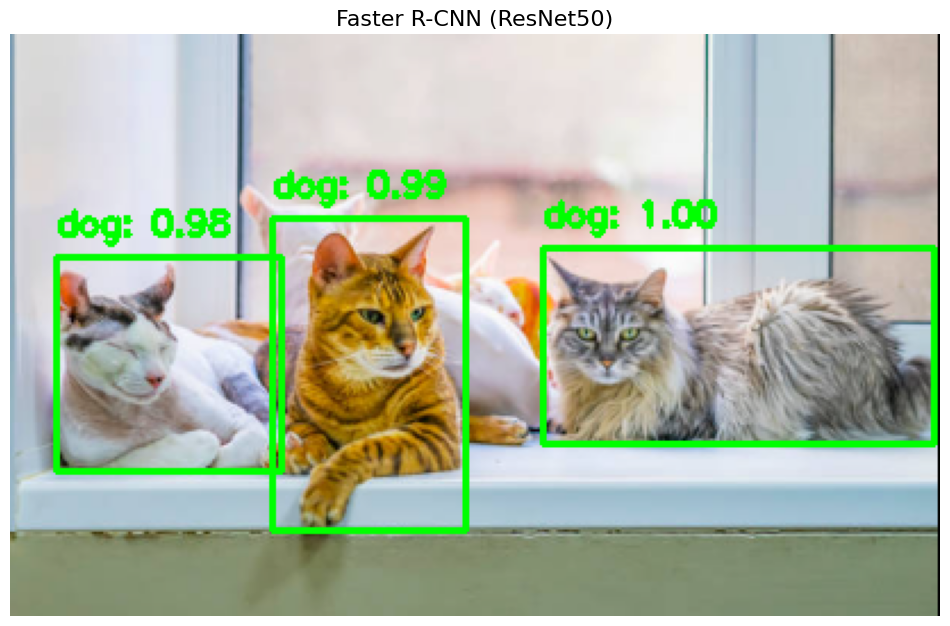


 Running: Faster R-CNN (ResNet101) 
Loading image from: cats.png
Found 3 objects with Faster R-CNN (ResNet101).


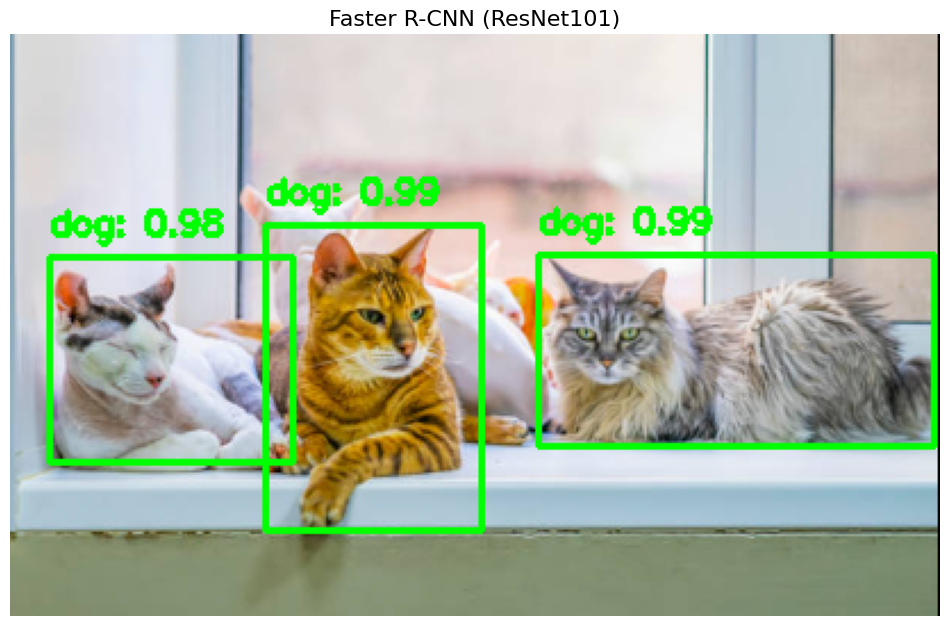


 Running: Faster R-CNN (ResNet152) 
Loading image from: cats.png
Found 6 objects with Faster R-CNN (ResNet152).


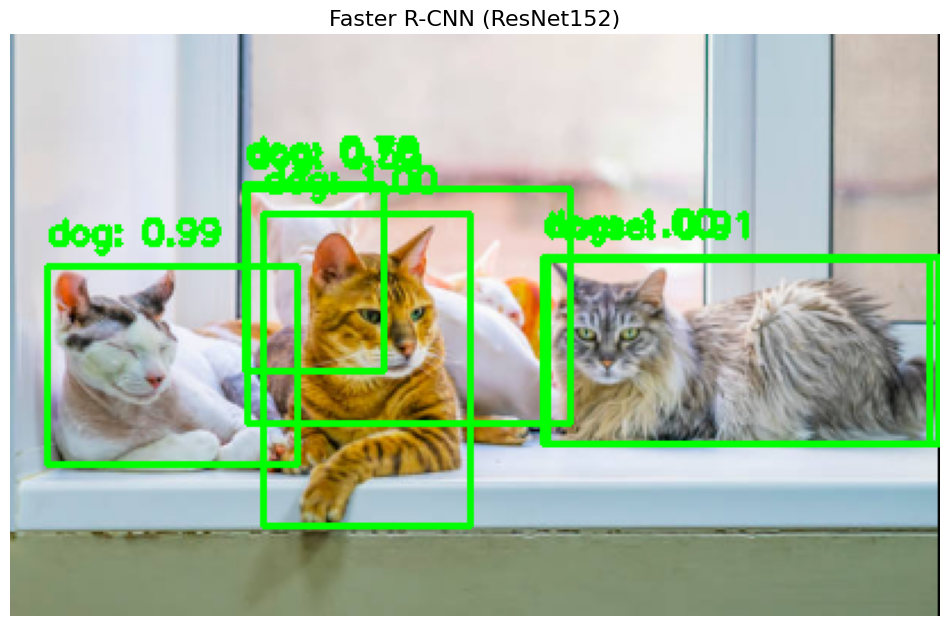

In [6]:
# Step 1 —Import Libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Step 2: Used 3 Model URLs and Loaded All Models
model_urls = {
    "Faster R-CNN (ResNet50)": "https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1",
    "Faster R-CNN (ResNet101)": "https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1",
    "Faster R-CNN (ResNet152)": "https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1"
}

# CHANGED: Load all models into a 'models' dictionary
models = {}
print("Loading all models")
for name, url in model_urls.items():
    print(f"Loading {name}")
    models[name] = hub.load(url)
print("All models loaded successfully.")


COCO_CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Step 3: Function for performing object detection
def perform_object_detection(model, image_path, threshold=0.5):
    # Load image from file path
    print("Loading image from:", image_path)
    image_pil = Image.open(image_path) # This is PIL, which is RGB
    image_pil = image_pil.convert("RGB") # This converts 4-channel RGBA to 3-channel RGB
    if image_pil is None:
        raise FileNotFoundError(f"Could not load image at {image_path}. Please check the file path.")

    # Convert PIL (RGB) to NumPy array for tensor
    image_rgb_np = np.array(image_pil)

    # Create the tensor from the RGB numpy array
    input_tensor = tf.convert_to_tensor(image_rgb_np)
    input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension

    # Run detection using the provided model
    detections = model(input_tensor)

    # Extract results
    boxes = detections['detection_boxes'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(int)
    scores = detections['detection_scores'][0].numpy()

    # Filter out detections below the confidence threshold
    valid_detections = scores > threshold
    boxes = boxes[valid_detections]
    classes = classes[valid_detections]
    scores = scores[valid_detections]

    # We convert the RGB numpy array to BGR for CV2 drawing.
    image_bgr_np = cv2.cvtColor(image_rgb_np, cv2.COLOR_RGB2BGR)

    return image_bgr_np, boxes, classes, scores

# Step 4: Function for displaying image with bounding box
def display_image_with_detections(image, boxes, class_indices, scores, model_name, threshold=0.5):
    # image is BGR, so we'll draw on it with CV2
    height, width, _ = image.shape
    for i in range(len(boxes)):
        if scores[i] > threshold:
            ymin, xmin, ymax, xmax = boxes[i]
            left, right, top, bottom = (int(xmin * width), int(xmax * width), int(ymin * height), int(ymax * height))
            # Draw bounding box
            cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
            # Draw label and confidence
            label = f"{COCO_CLASSES[class_indices[i] - 1]}: {scores[i]:.2f}"
            cv2.putText(image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show the result with matplotlib
    # Add a title to know which model is which
    plt.figure(figsize=(12, 8))
    plt.title(model_name, fontsize=16)
    plt.imshow(image[:, :, ::-1])  # BGR to RGB for plotting
    plt.axis('off')
    plt.show()

# Step 6: Evaluating ALL models with the given image
image_path = "cats.png"  # Make sure this image exists

print(f"Starting Comparison for: {image_path}")

for model_name, model_object in models.items():
    print(f"\n Running: {model_name} ")
    try:
        # 1. Pass the loaded model_object to the function
        image_bgr, detected_boxes, detected_classes, detected_scores = perform_object_detection(model_object, image_path, threshold=0.5)

        print(f"Found {len(detected_boxes)} objects with {model_name}.")

        # 2. Pass the model_name for the title
        display_image_with_detections(image_bgr, detected_boxes, detected_classes, detected_scores, model_name, threshold=0.5)

    except FileNotFoundError as e:
        print(e)
        print("Stopping comparison because image file was not found.")
        break # Stop if the file isn't found
    except Exception as e:
        print(f"An error occurred while processing with {model_name}: {e}")

***Task3***

---



In [8]:
# Step 1: Import Libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
from PIL import Image
import os
import glob
import xml.etree.ElementTree as ET # For parsing XML annotations

#  Step 2: Load Model and Define Classes
MODEL_URL = "https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1"
print("Loading model...")
model = hub.load(MODEL_URL)
print("Model loaded.")

# This list is 0-indexed. The model outputs 1-indexed classes.
COCO_CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# We need to map our ground-truth class name 'cat' to the model's class ID
# 'cat' is the 16th item, so its index is 15. Model is 1-indexed, so ID is 16.
CLASS_NAME = 'cat'
CLASS_ID = 16

# --- Step 3: Function to Get Model Predictions ---
def perform_object_detection(model, image_path, threshold=0.5):
    try:
        image_pil = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None

    image_rgb_np = np.array(image_pil)
    height, width, _ = image_rgb_np.shape
    input_tensor = tf.convert_to_tensor(image_rgb_np)[tf.newaxis, ...]

    detections = model(input_tensor)

    boxes = detections['detection_boxes'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(int)
    scores = detections['detection_scores'][0].numpy()

    # Filter by confidence threshold
    valid_detections = scores > threshold
    boxes = boxes[valid_detections]
    classes = classes[valid_detections]
    scores = scores[valid_detections]

    # Convert normalized boxes [ymin, xmin, ymax, xmax] to pixel [xmin, ymin, xmax, ymax]
    pixel_boxes = []
    for box in boxes:
        ymin, xmin, ymax, xmax = box
        pixel_boxes.append([int(xmin * width), int(ymin * height), int(xmax * width), int(ymax * height)])

    return np.array(pixel_boxes), classes, scores

# --- Step 4: Function to Parse XML Annotations ---
def parse_xml_annotation(xml_path):
    """Parses a PASCAL VOC XML file to get ground-truth boxes."""
    tree = ET.parse(xml_path)
    root = tree.getroot()

    ground_truths = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        if name == CLASS_NAME:
            bndbox = obj.find('bndbox')
            # Get pixel coordinates
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            ground_truths.append([xmin, ymin, xmax, ymax])

    return np.array(ground_truths)

# --- Step 5: Function to Calculate Intersection over Union (IoU) ---
def calculate_iou(box1, box2):
    """Calculates IoU between two bounding boxes [xmin, ymin, xmax, ymax]."""
    # Find the intersection coordinates
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    # Calculate intersection area
    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    # Calculate individual box areas
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculate union area
    union_area = box1_area + box2_area - inter_area

    if union_area == 0:
        return 0.0

    return inter_area / union_area

# --- Step 6: Function to Calculate Average Precision (AP) ---
def calculate_average_precision(all_preds, all_gts, iou_threshold=0.5):
    """Calculates Average Precision (AP) for the 'cat' class."""

    # Detections: [image_name, confidence, is_true_positive]
    detections = []
    total_ground_truths = 0

    # Match predictions to ground truths
    for image_name in all_gts:
        preds = all_preds.get(image_name, [])
        gts = all_gts[image_name]
        total_ground_truths += len(gts)

        # Keep track of which ground truths in this image have been "used"
        gt_used = [False] * len(gts)

        # Filter predictions for our class ID
        for p in preds:
            if p['class_id'] == CLASS_ID:
                detections.append({'conf': p['score'], 'image_name': image_name, 'tp': False, 'box': p['box']})

    # Sort detections by confidence (highest first)
    detections.sort(key=lambda x: x['conf'], reverse=True)

    # Calculate True Positives (TP) and False Positives (FP)
    tp_count = 0
    fp_count = 0

    if total_ground_truths == 0:
        print("Warning: No ground-truth boxes found for class 'cat'. mAP will be 0.")
        return 0.0

    precision = []
    recall = []

    for i, det in enumerate(detections):
        gts_for_image = all_gts[det['image_name']]
        gt_used = [False] * len(gts_for_image) # Reset 'used' status for each detection (this is a flaw, let's fix)

        # We need a permanent 'used' marker for each image
        # Let's rebuild the 'all_gts' structure to include 'used' status

    # Re-initialize ground truth tracking
    gt_map = {} # {image_name: {'boxes': [...], 'used': [False, False, ...]}}
    for image_name, boxes in all_gts.items():
        gt_map[image_name] = {'boxes': boxes, 'used': [False] * len(boxes)}

    for i, det in enumerate(detections):
        image_name = det['image_name']
        gts = gt_map[image_name]['boxes']
        best_iou = 0.0
        best_gt_idx = -1

        # Find best matching ground truth
        for j, gt_box in enumerate(gts):
            iou = calculate_iou(det['box'], gt_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = j

        if best_iou >= iou_threshold:
            if not gt_map[image_name]['used'][best_gt_idx]:
                # This is a True Positive
                tp_count += 1
                det['tp'] = True
                gt_map[image_name]['used'][best_gt_idx] = True # Mark this GT as used
            else:
                # This is a False Positive (duplicate detection)
                fp_count += 1
        else:
            # This is a False Positive (low IoU)
            fp_count += 1

        # Calculate precision and recall at this step
        p = tp_count / (tp_count + fp_count)
        r = tp_count / total_ground_truths
        precision.append(p)
        recall.append(r)

    # Calculate AP using 11-point interpolation (standard PASCAL VOC method)
    ap = 0.0

Loading model...
Model loaded.


In [11]:
# Step 1: Import Libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
from PIL import Image
import os
import glob
import xml.etree.ElementTree as ET # For parsing XML annotations

# --- Step 2: Load Model and Define Classes ---
MODEL_URL = "https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1"
print("Loading model...")
model = hub.load(MODEL_URL)
print("Model loaded.")

# This list is 0-indexed. The model outputs 1-indexed classes.
COCO_CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# We need to map our ground-truth class name 'cat' to the model's class ID
CLASS_NAME = 'cat'
CLASS_ID = 16 # 'cat' is the 16th item in the COCO list (1-indexed)

# --- Step 3: Function to Get Model Predictions ---
def perform_object_detection(model, image_path, threshold=0.5):
    try:
        image_pil = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None, None

    image_rgb_np = np.array(image_pil)
    height, width, _ = image_rgb_np.shape
    input_tensor = tf.convert_to_tensor(image_rgb_np)[tf.newaxis, ...]

    detections = model(input_tensor)

    boxes = detections['detection_boxes'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(int)
    scores = detections['detection_scores'][0].numpy()

    # Filter by confidence threshold
    valid_detections = scores > threshold
    boxes = boxes[valid_detections]
    classes = classes[valid_detections]
    scores = scores[valid_detections]

    # Convert normalized boxes [ymin, xmin, ymax, xmax] to pixel [xmin, ymin, xmax, ymax]
    pixel_boxes = []
    for box in boxes:
        ymin, xmin, ymax, xmax = box
        pixel_boxes.append([int(xmin * width), int(ymin * height), int(xmax * width), int(ymax * height)])

    return np.array(pixel_boxes), classes, scores

# --- Step 4: Function to Parse XML Annotations ---
def parse_xml_annotation(xml_path):
    """Parses a PASCAL VOC XML file to get ground-truth boxes."""
    tree = ET.parse(xml_path)
    root = tree.getroot()

    ground_truths = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        if name == CLASS_NAME:
            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            ground_truths.append([xmin, ymin, xmax, ymax])

    return np.array(ground_truths)

# --- Step 5: **MODIFIED** Function to Save Visualization ---
# --- Now draws BOTH ground-truth and predicted boxes ---
def save_visualization(image_path, pred_boxes, pred_classes, pred_scores, gt_boxes, save_path):
    """Draws boxes on an image and saves it to a file."""
    # Load image using OpenCV (BGR format)
    image = cv2.imread(image_path)

    # Draw Ground-Truth Boxes (Correct Answers) in BLUE
    for (xmin, ymin, xmax, ymax) in gt_boxes:
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2) # BLUE
        cv2.putText(image, "Ground Truth", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Draw Predicted Boxes (Model's Guess) in GREEN
    for i in range(len(pred_boxes)):
        if pred_classes[i] == CLASS_ID: # Only draw boxes for our 'cat' class
            xmin, ymin, xmax, ymax = pred_boxes[i]

            # Draw bounding box
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2) # GREEN

            # Draw label and confidence
            label = f"{CLASS_NAME}: {pred_scores[i]:.2f}"
            cv2.putText(image, label, (xmin, ymax + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the output image
    cv2.imwrite(save_path, image)
    print(f"  Successfully saved visualization to: {save_path}")
    print("  (Prediction = GREEN, Ground Truth = BLUE)")


# --- Step 6: Function to Calculate IoU ---
def calculate_iou(box1, box2):
    """Calculates IoU between two bounding boxes [xmin, ymin, xmax, ymax]."""
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])
    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    if union_area == 0:
        return 0.0
    return inter_area / union_area

# --- Step 7: Function to Calculate Average Precision (AP) ---
def calculate_average_precision(all_preds, all_gts, iou_threshold=0.5):
    """Calculates Average Precision (AP) for the 'cat' class."""
    detections = []
    total_ground_truths = 0

    gt_map = {} # Tracks 'used' status for each ground truth
    for image_name, boxes in all_gts.items():
        total_ground_truths += len(boxes)
        gt_map[image_name] = {'boxes': boxes, 'used': [False] * len(boxes)}

        preds = all_preds.get(image_name, [])
        for p in preds:
            if p['class_id'] == CLASS_ID:
                detections.append({'conf': p['score'], 'image_name': image_name, 'tp': False, 'box': p['box']})

    if total_ground_truths == 0:
        print("Warning: No ground-truth boxes found for class 'cat'. mAP will be 0.")
        return 0.0

    detections.sort(key=lambda x: x['conf'], reverse=True)

    tp_count = 0
    fp_count = 0
    precision = []
    recall = []

    for i, det in enumerate(detections):
        image_name = det['image_name']
        gts = gt_map[image_name]['boxes']
        best_iou = 0.0
        best_gt_idx = -1

        for j, gt_box in enumerate(gts):
            iou = calculate_iou(det['box'], gt_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = j

        # Check if detection is valid
        if best_iou >= iou_threshold:
            if not gt_map[image_name]['used'][best_gt_idx]:
                tp_count += 1
                det['tp'] = True
                gt_map[image_name]['used'][best_gt_idx] = True # Mark this GT as used
            else:
                fp_count += 1 # Duplicate detection
        else:
            fp_count += 1 # Low IoU or no match

        # Handle division by zero
        if (tp_count + fp_count) == 0:
            p = 0.0
        else:
            p = tp_count / (tp_count + fp_count)

        r = tp_count / total_ground_truths
        precision.append(p)
        recall.append(r)

    # Calculate AP using 11-point interpolation
    ap = 0.0
    for t in np.arange(0.0, 1.1, 0.1): # Recall thresholds [0, 0.1, ..., 1.0]
        if not precision:
            p = 0.0
        else:
            # Get max precision for recall values >= t
            precisions_at_recall = [p for p, r in zip(precision, recall) if r >= t]
            p = max(precisions_at_recall) if precisions_at_recall else 0.0
        ap += p / 11.0

    return ap

# --- Step 8: Main Evaluation Loop (Now with Visualization) ---
def run_evaluation(image_dir, annot_dir, confidence_threshold, iou_threshold):
    print(f"Starting evaluation on dataset at: {image_dir}")
    print(f"Using annotations from: {annot_dir}")

    image_paths = sorted(glob.glob(os.path.join(image_dir, '*.jpg')) + \
                         glob.glob(os.path.join(image_dir, '*.png')) + \
                         glob.glob(os.path.join(image_dir, '*.jpeg')))

    if not image_paths:
        print(f"Error: No images found in {image_dir}")
        return

    all_predictions = {}
    all_ground_truths = {}

    total_images = len(image_paths)
    for i, image_path in enumerate(image_paths):
        image_name = os.path.basename(image_path)
        print(f"Processing {i+1}/{total_images}: {image_name}")

        # Get Ground Truth
        xml_name = os.path.splitext(image_name)[0] + '.xml'
        xml_path = os.path.join(annot_dir, xml_name)

        current_gt_boxes = np.array([]) # Default to empty
        if not os.path.exists(xml_path):
            print(f"  Warning: No annotation file found at {xml_path}")
            all_ground_truths[image_name] = np.array([])
        else:
            current_gt_boxes = parse_xml_annotation(xml_path)
            all_ground_truths[image_name] = current_gt_boxes

        # Get Predictions
        boxes, classes, scores = perform_object_detection(model, image_path, confidence_threshold)

        # Visualizing 1st image
        if i == 0:
            print(f"  Saving visualization for this first image...")
            # MODIFIED: Pass ground-truth boxes to the visualization function
            save_visualization(image_path, boxes, classes, scores, current_gt_boxes, "visualization_output.jpg")

        preds_for_image = []
        if boxes is not None:
            for b, c, s in zip(boxes, classes, scores):
                preds_for_image.append({'box': b, 'class_id': c, 'score': s})

        all_predictions[image_name] = preds_for_image

    print("\nFinished processing all images. Now calculating AP")

    # Calculate AP
    ap = calculate_average_precision(all_predictions, all_ground_truths, iou_threshold)

    print(f"Calculating AP per class")
    print(f"Class '{CLASS_NAME}': AP = {ap:.4f}")

    print("\nFinal Results")
    print(f"Evaluated on dataset at: {image_dir}")
    print(f"Confidence Threshold: {confidence_threshold}")
    print(f"IoU Threshold: {iou_threshold}")
    print(f"mAP (@{iou_threshold}): {ap:.4f}")
    print("\nPer-class AP for classes found in my dataset:")
    print(f"{CLASS_NAME}: {ap:.4f}")

#  Step 9: Run the script
if __name__ == "__main__":

    # Path to folder of 150 cat images
    IMAGE_DIR = "/content/drive/MyDrive/Cat/images"
    # Path to folder of XML annotation files
    ANNOT_DIR = "/content/drive/MyDrive/Cat/Annotation"
    # SET EVALUATION PARAMETERS
    CONFIDENCE_THRESHOLD = 0.1
    IOU_THRESHOLD = 0.1

    if not os.path.exists(IMAGE_DIR):
        print(f"Error: Image directory not found: {IMAGE_DIR}")
    elif not os.path.exists(ANNOT_DIR):
        print(f"Error: Annotation directory not found: {ANNOT_DIR}")
        print("Please update the ANNOT_DIR variable in the script.")
    else:
        run_evaluation(IMAGE_DIR, ANNOT_DIR, CONFIDENCE_THRESHOLD, IOU_THRESHOLD)

Loading model...
Model loaded.
Starting evaluation on dataset at: /content/drive/MyDrive/Cat/images
Using annotations from: /content/drive/MyDrive/Cat/Annotation
Processing 1/151: I1.png
  Saving visualization for this first image...
  Successfully saved visualization to: visualization_output.jpg
  (Prediction = GREEN, Ground Truth = BLUE)
Processing 2/151: I10.png
Processing 3/151: I100.png
Processing 4/151: I101.png
Processing 5/151: I102.png
Processing 6/151: I103.png
Processing 7/151: I104.png
Processing 8/151: I106.png
Processing 9/151: I107.png
Processing 10/151: I108.png
Processing 11/151: I109.png
Processing 12/151: I11.png
Processing 13/151: I110.png
Processing 14/151: I111.png
Processing 15/151: I112.png
Processing 16/151: I113.png
Processing 17/151: I114.png
Processing 18/151: I115.png
Processing 19/151: I116.png
Processing 20/151: I117.png
Processing 21/151: I118.png
Processing 22/151: I119.png
Processing 23/151: I12.png
Processing 24/151: I120.png
Processing 25/151: I121.p